# **Data Science Studies**

This notebook describes initial data science studies. The main goal of this project is studies machine learn models and statistical analyses through the Titanic dataset. 

## **1 Kaggle Getting Start Competition - Titanic**

All information about the competition was extracted from [kaggle](https://www.kaggle.com/c/titanic)


## **1.1 Competition Description**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.



## **1.2 Goal**

The main goal is to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, we must predict a 0 or 1 value for the Survived variable.


## **1.3 Data**

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Data Dictionary**

| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

## **2 Data Understanding**

Import necessaries libraries

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Clasifiers
from sklearn.ensemble import RandomForestClassifier
# Modelling Helpers
from sklearn.model_selection import StratifiedKFold, train_test_split


Initial setup 

In [230]:
sns.set_style("darkgrid")

#### **Usefull functions**

In [231]:
def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )

### **2.1 Loading training data**

In [232]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


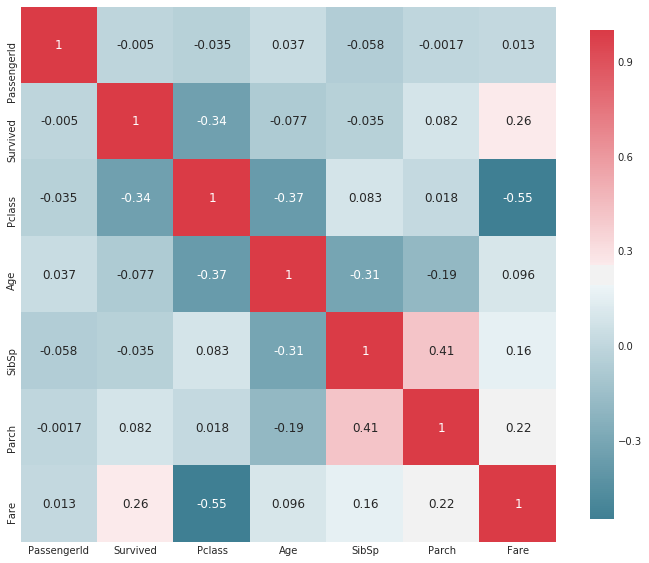

In [233]:
plot_correlation_map(df_train)

In [234]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


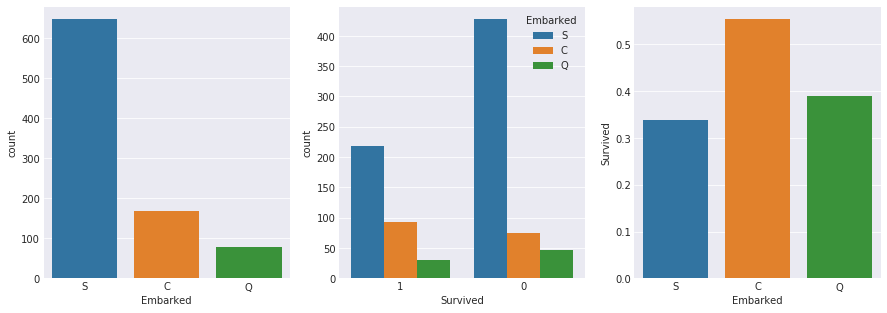

In [235]:
# Embarked

# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
df_train["Embarked"] = df_train["Embarked"].fillna("S")

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=df_train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=df_train, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = df_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
_ = sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S','C','Q'],ax=axis3)


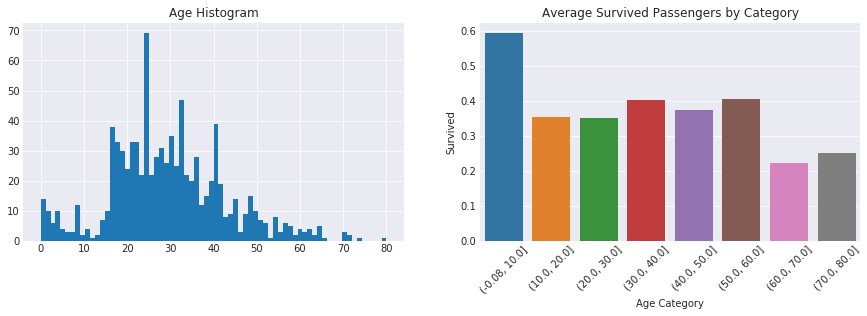

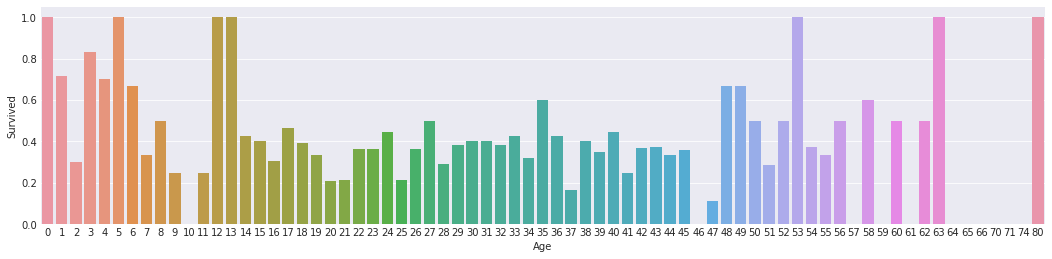

In [247]:
# Age

fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(15,4))
axis1.set_title('Age Histogram')
axis2.set_title('Average Survived Passengers by Category')

average_age = df_train["Age"].mean()
std_age = df_train["Age"].std()
count_nan_age = df_train["Age"].isnull().sum()

# Replace nan ages with a random age based on average +- std
fill_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)
df_train.loc[np.isnan(df_train["Age"]), 'Age'] = fill_age

df_train['Age'] = df_train['Age'].astype(int)

# Categorize Age - 10 years by category
df_train['Age Category'] = pd.cut(df_train['Age'], 8)

# average survived passengers by category
age_perc = df_train[["Age Category", "Survived"]].groupby(['Age Category'], as_index=False).mean()
df_train['Age'].astype(int).hist(bins=70, ax=axis1)

__ = sns.barplot(x='Age Category', y='Survived', data=age_perc)
__ = __.set_xticklabels(age_perc['Age Category'].unique(), rotation=45)

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
__ = sns.barplot(x='Age', y='Survived', data=average_age)
# __.set_tittle('Average survived passengers by age')

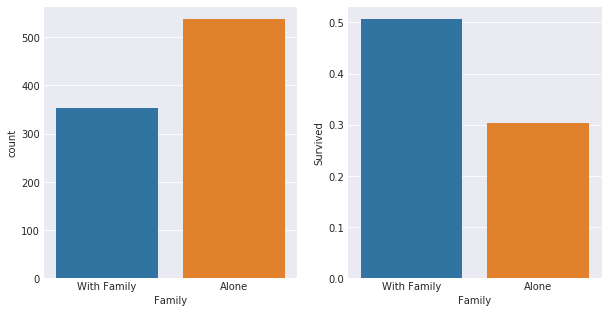

In [237]:

# Family
df_train['Family'] =  df_train["Parch"] + df_train["SibSp"]
df_train.loc[df_train['Family'] > 0, 'Family'] = 1
df_train.loc[df_train['Family'] == 0, 'Family'] = 0

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
__ = sns.countplot(x='Family', data=df_train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = df_train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
__ = sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

__ = axis1.set_xticklabels(["With Family","Alone"], rotation=0)


## **References**

[1] [A Journey through Titanic - Omar El Gabry](https://www.kaggle.com/omarelgabry/a-journey-through-titanic).